In this file, we will study how to generate the basic drawing such as `circle`, `ellipse`, `line`, `polygon`, etc by using `OpenCV` and `skimage`.

Moreover, you can also implement the same thing by using [PIL](https://note.nkmk.me/en/python-pillow-imagedraw/).

First of all, we need import the following libraries.

In [1]:
import cv2
import skimage.io
import numpy as np
import skimage.draw as sdraw
import matplotlib.pyplot as plt

## 1 Initialize a `black-rectangle-interface`
### 1.1. Display with `matplotlib`

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

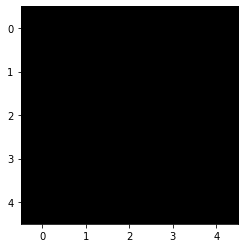

In [2]:
img = np.zeros((5, 5), dtype=np.uint8)
plt.imshow(img, 'gray');
img

### 1.2. How to do the same-thing with `skimage`?

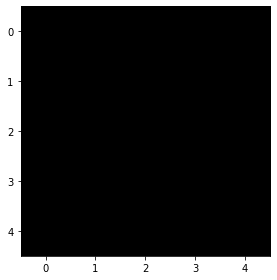

In [3]:
img = np.zeros((5, 5), dtype=np.uint8)
skimage.io.imshow(img);

Since the `order of channels` in `skimage` is `Red, Green, Blue` which corresponding to chanel index `0, 1, 2` in the third dimension of the `image_source`, so

$\qquad$ If you want to fill the color in red, then plug the first chanel `img[:, :, 0] = 255`

$\qquad$ In blue, plug the second chanel `img[:, :, 1] = 255`

$\qquad$ In green, plug the third chanel `img[:, :, 2] = 255`

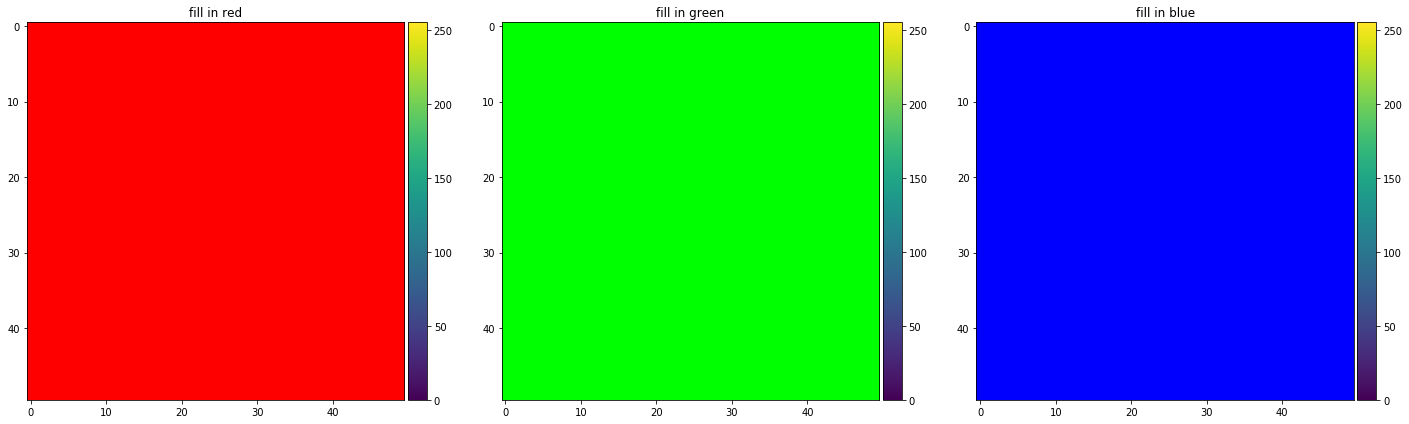

In [5]:
titles = ['red', 'green', 'blue']
plt.figure(figsize = (20, 6))
for k in range(3):
    img = np.zeros((50, 50, 3), dtype=np.uint8)
    img[:,:,k] = 255
    plt.subplot(1, 3, k+1)
    plt.title("fill in %s"%titles[k]);
    skimage.io.imshow(img)

$\quad$ But, how can assign another pixel_values in to your images, such as [255, 255, 0] for the `yellow`? 

$\qquad$ **Solution. `numpy.where(array, input_condition, new_values)`**

$\qquad$ **Reminder. Additive color.**. 

$\qquad \qquad \diamond$ Addition of the 2 `primary colors` `red` and `green` yields `yellow`; `green` and `blue` yields `cyan`; while `red & blue` yields `magenta`.

$\qquad \qquad \diamond$ Adding all three primary colors together yields `white`.

In [6]:
img = np.zeros((5, 5, 3), dtype=np.uint8)
yellow = np.where(img, img == [0, 0, 0], [255, 255, 0])
cyan = np.where(img, img == [0, 0, 0], [0, 255, 255])
magenta = np.where(img, img == [0, 0, 0], [255, 0, 255])
white = np.where(img, img == [0, 0, 0], [255, 255, 255])

titles = ['yellow', 'cyan', 'magenta', 'white']
images = [yellow, cyan, magenta, white]

$\qquad \qquad$ Now, display all of them!

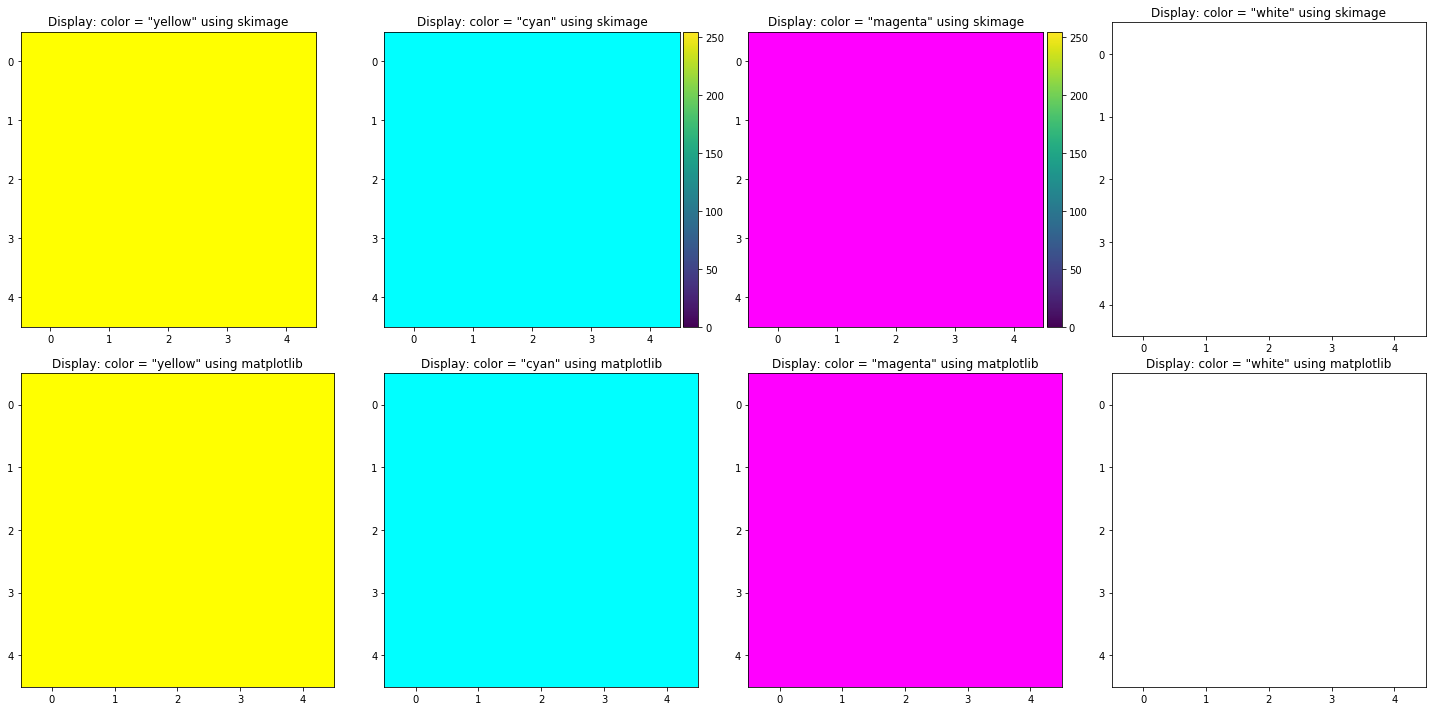

In [7]:
plt.figure(figsize = (20, 10))
for k in range(4):
    plt.subplot(2, 4, k+1)
    plt.title('Display: color = "%s" using skimage'%titles[k])
    skimage.io.imshow(images[k])

    plt.subplot(2, 4, k+5)
    plt.title('Display: color = "%s" using matplotlib'%titles[k])
    plt.imshow(images[k])

**`Remarks / Comments`.** 

$\qquad \diamond$ Using `matplotlib` and `skimage` return the same result when display an image, but in `opencv` with `cv2.imshow()` you must convert `RGB (in matplotlib)` to `BGR (in opencv)` to get the true-color!

$\qquad \diamond$ To get more convenient, in the rest of this kernel, I will display the images in `matplotlib (with plt.imshow)` after generate the `lines, circles, ellipes, etc` by using `skimage` and `opencv`

## 2. Generate a `line`
$\quad$ Of course, to plot any line or segment, we need to know the `starting_point` and the `ending`.
### 2.1. Using `opencv`
$\qquad$ You can create a line in `opencv` with `cv2.line`

$\qquad$ **`Syntax`.**

            cv2.line(img, start, end, color, thickness)            
$\qquad$ where,

$\qquad \qquad \bullet$ `img (numpy array):` the image where you want to draw the shapes (here is the line)

$\qquad \qquad \bullet$ `start, end (tupple of 2 numeric):` contains the coordinate of the starting and ending points.

$\qquad \qquad \bullet$ `color (tupple of 3 integers):` color of the shape; such as `(255, 255, 255)` of `white` and `(255,0,0)` for the `blue` but it is `red` in case using `matplotlib`

$\qquad \qquad \bullet$  `thickness (int):` is the thickness of the lines of circles. If a negative is passed for the `closed figures` like `circles`, it will fill whole the shape. `Default = 1`!

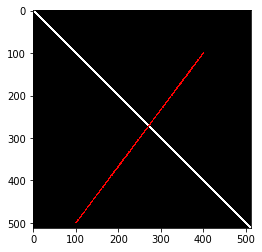

In [8]:
img = np.zeros((512,512,3), dtype=np.uint8)
img = cv2.line(img, (0, 0), (511,511), (255, 255, 255), 3)   ## first line: from (0, 0) to (511, 511), white
img = cv2.line(img, (400, 100), (100, 500), (255, 0, 0), 2)  ## second line: from (400, 100) to (100, 500), red
plt.imshow(img);

### 2.2. Using `skimage`
$\qquad$ In the `skimage.draw`, we can use the function `line` to generate the line but more simplier than in `opencv`; **`syntax`**

                skimage.draw.line(x_start, y_start, x_end, y_end)                
$\qquad$ This function returns a `ndarray of int` contains the `indices of pixels` that belong to the line.    

$\qquad$ The first disadvantage of this function compared to `cv2.line` is missing the statements of `color` and `thickness`

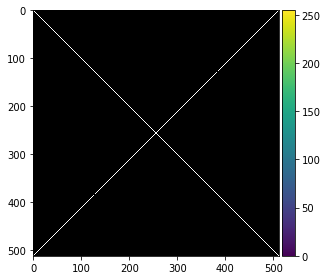

In [9]:
img = np.zeros((512, 512, 3), dtype=np.uint8)   ## initialize a black-square-image
xx1, yy1 = sdraw.line(0, 0, 511, 511)           ## first line, from (0, 0) to (511, 511)
xx2, yy2 = sdraw.line(511, 0, 0, 511)           ## second line, from (511, 0) to (0, 511)
img[xx1, yy1] = 255
img[xx2, yy2] = 255
skimage.io.imshow(img);

## 3. Rectangle!
$\quad$ Given 2 points on the diagonal of a rectangle, we will easy determine the last 2 points, and this is the behind idea in `cv2.rectangle`
### 3.1. Using `opencv`
$\qquad$ Assume that the name of your rectangle is `ABCD`, so

$\qquad$ **`Syntax`.** 

            cv2.rectangle(img, point_A, point_C, color, thickness)
            
$\qquad$ For example, you want to create the rectangle of 4 coordinates: `A (50, 50), B(50, 100), C (100, 100)` and `D(100, 50)` then the `point_A` and `point_C` in the `syntax` play the roles the `top-left-corner` and `bottom-right-corner` respectively; in the rectangle.

$\qquad$ Look at the following illustration!

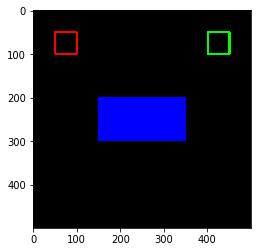

In [10]:
img = np.zeros((500, 500, 3), dtype=np.uint8)

img = cv2.rectangle(img, (50, 50), (100, 100), (255, 0, 0), 3)     ## first rect
img = cv2.rectangle(img, (150, 200), (350, 300), (0, 0, 255), -1)   ## 2nd rect
img = cv2.rectangle(img, (400, 50), (450, 100), (0, 255, 0), 3)    ## 3rd rect
plt.imshow(img);

### 3.2. And using `skimage`

$\qquad$ Unlike the secret in the `opencv`, we only need one `starting_point` and the `size` of a rectangle to extend and determine the other points. Hence, in `skimage.draw` we also have the function `rectangle` with the following `syntax`:

                    skimage.draw.rectangle(start, extent, shape)
$\qquad$ **Explains.**

$\qquad \qquad \bullet$ `start (tupple of numerics)`: contain the coordinates_values of the `top-left-corner`

$\qquad \qquad \bullet$ `extent (tupple)` is the `extent (size)` of the drawn rectangle. For instance `start = (x0, y0)` and `extent = (a, b)` then the last 3 points be `(x0 + a, y0), (x0 + a, y0 + b)` and `(x0 + a, y0 + b)`.

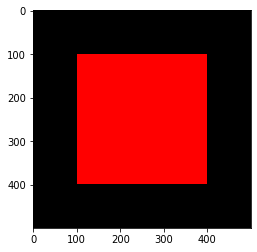

In [11]:
img = np.zeros((500, 500, 3), dtype=np.uint8)

start = (100, 100)
extent = (300, 300)
xx, yy = sdraw.rectangle(start, extent=extent, shape=img.shape)
img[xx, yy] = 255

img = np.where(~img, img == 255, [255,0,0])
plt.imshow(img);

## 4. Circle!
$\qquad$ We all known that: to plot an circle, we need the 2 most important information: `center_coordinate`$(x_c, y_c)$ and `radius:`$r$, 

$\qquad$ Follow that, the equation of a circle can be writen as
$$ (x - x_c)^2 + (y - y_c)^2 = r^2 $$
or

$$\left \lbrace \begin{array}{ccl} x &=& x_c + r\cos(t) \\ y &=& y_c + r\sin(t) \end{array} \right., \quad t \in [-\pi, \pi]$$

### 4.1. Using `OpenCV`
$\qquad$ **`Syntax`**

                            cv2.circle(image, center_coordinate, radius, color, thickness)
$\qquad \qquad \qquad \bullet$ `center_coordinate (tupple)` contains `x_center` and `y_center` which the coordinate of the center in a circle.

$\qquad \qquad \qquad \bullet$ `radius`: radius of the circle

$\qquad \qquad \qquad \qquad$ As we mentioned, when `thickness` is negative then it will fill whole the `closed figure`

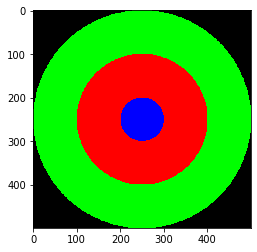

In [12]:
img = np.zeros((500, 500, 3), dtype=np.uint8)

img = cv2.circle(img, (250, 250), 250, (0, 255, 0), -1)
img = cv2.circle(img, (250, 250), 150, (255, 0, 0), -1)
img = cv2.circle(img, (250, 250), 50, (0, 0, 255), -1)
plt.imshow(img)

### 4.2. Using `skimage`
$\qquad$ In `skimage.draw` we use the function `circle_perimeter` to plot the `perimeter` (or boundary) of the `circle` by the following `syntax`:

                    skimage.draw.circle_perimeter(x_center, y_center, radius)
$\qquad$ **Explains.**

$\qquad \qquad \bullet$ `x_center, y_center :` center coordinate of the circle.

$\qquad \qquad \bullet$ `radius`: radius of your circle.

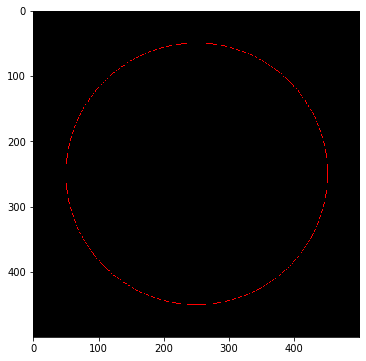

In [13]:
img = np.zeros((500, 500, 3), dtype=np.uint8)
rr, cc = sdraw.circle_perimeter(250, 250, 200)

plt.figure(figsize = (6, 6))
img[rr, cc] = 255
img = np.where(~img, img == 255, [255,0,0])
plt.imshow(img)

## 5. Ellipse.
$\quad$ Again, to determine whole the ellipse, we only need the `center_coordinate` but **2 `radius`** to generate a `2D-ellipse` via the following equation.

$$ \frac{(x - x_c)^2}{r_1^2} + \frac{(y - y_c)^2}{r_2^2} = 1 $$
or

$$\left \lbrace \begin{array}{ccl} x &=& x_c + r_1\cos(t) \\ y &=& y_c + r_2\sin(t) \end{array} \right., \quad t \in [-\pi, \pi]$$

### 5.1. Using `opencv`
$\qquad$ **`Syntax`**

               cv2.ellipse(image, center_coordinate, radiuses, angle, start_angle, end_angle, color, thickness)
$\qquad \qquad \bullet$ `radiuses (tuple)` is the **`major radius`** and **`minor_radius`**

$\qquad \qquad \bullet$ `angle (int)` is the angle of the rotation of ellipse in `anti-clockwise` direction.

$\qquad \qquad \bullet$ `start_angle` and `end_engle (int)` denotes the `starting` and `ending` of the ellipse are measured in `clockwise` direction fron the `major-axis` (or `major-radius`).

$\qquad$ **Rotate the `full-ellipse` with different `angle`**.

$\qquad \qquad \qquad$ The `full-ellipse` meant `start_angle = 0` and `end_angle = 360`

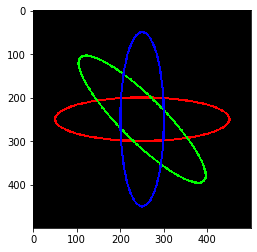

In [14]:
img = np.zeros((500, 500, 3), dtype=np.uint8)
img = cv2.ellipse(img, (250, 250), (200, 50), 0, 0, 360, (255, 0, 0), 3)   ## No rotation (red)
img = cv2.ellipse(img, (250, 250), (200, 50), 45, 0, 360, (0, 255, 0), 3)  ## rotation = 45 (green)
img = cv2.ellipse(img, (250, 250), (200, 50), 90, 0, 360, (0, 0, 255), 3)  ## rotation = 90 (blue) 

plt.imshow(img)

$\qquad$ **`Full-ellipse` with different radius**

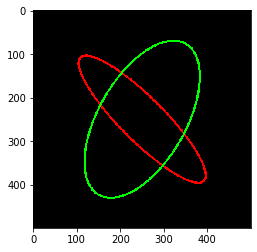

In [15]:
img = np.zeros((500, 500, 3), dtype=np.uint8)
img = cv2.ellipse(img, (250, 250), (200, 50), 45, 0, 360, (255, 0, 0), 3)
img = cv2.ellipse(img, (250, 250), (100, 200), 30, 0, 360, (0, 255, 0), 3)

plt.imshow(img)

$\qquad$ **`Partial-ellipse`!** To get a curves of the ellipse, you must restrict the `start_angle` and `end_angle`. In the following figure, we divide the `ellipse` into 4 parts! Noting that, the direction of your ellipse in `OpenCV` is `anti-clockwise` direction!

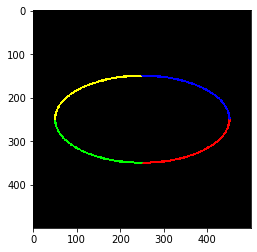

In [16]:
img = np.zeros((500, 500, 3), dtype=np.uint8)

## The first-part, starting angle = 0 and end = 0 is filled in red
img = cv2.ellipse(img, (250, 250), (200, 100), 0, 0, 90, (255, 0, 0), 3)

## The second, from 90 to 180 degree and filled in green
img = cv2.ellipse(img, (250, 250), (200, 100), 0, 90, 180, (0, 255, 0), 3)

## The third, from 180 to 270 degree and filled in yellow
img = cv2.ellipse(img, (250, 250), (200, 100), 0, 180, 270, (255, 255, 0), 3)

## The last one, filled in blue
img = cv2.ellipse(img, (250, 250), (200, 100), 0, 270, 360, (0, 0, 255), 3)

plt.imshow(img)

### 5.2. Using `skimage`
$\qquad$ Likewise, we have the `syntax`
    
                    skimage.draw.ellipse(x_center, y_center, x_axis_length, y_axis_length)

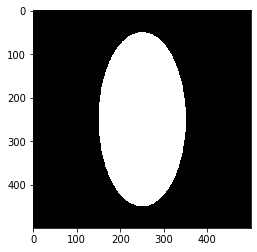

In [17]:
img = np.zeros((500, 500, 3), dtype=np.uint8)
rr, cc = sdraw.ellipse(250, 250, 200, 100)
img[rr, cc] = 255
plt.imshow(img)

## 6. Polygon
### 6.1. In `OpenCV`
$\qquad$ **`Syntax`.**

                        cv2.polylines(image, list_of_points, is_row, color, thickness)
$\qquad$ **Explaination.**

$\qquad \qquad \qquad \bullet$ `list_of_points (list of array)` contains the needed coordinates of the vertices of a polygon.

$\qquad \qquad \qquad \bullet$ `is_row (bool)`, make these points into an `array` of shape `nrows x 1 x 2` where `nrows` are the number of `vertices` and should be the type of `np.int32`

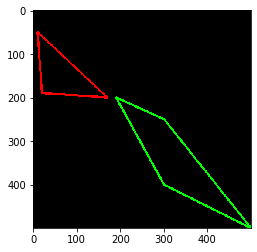

In [18]:
img = np.zeros((500, 500, 3), dtype = np.uint8)
pts_tri = np.array([[10, 50], [20, 190], [170, 200]], dtype = np.int32).reshape((-1, 1, 2)) 
pts_qdr = np.array([[300, 250], [500, 500], 
                    [300, 400], [190, 200]], dtype = np.int32).reshape((-1, 1, 2))

img = cv2.polylines(img, [pts_tri], True, (255, 0, 0), 3)
img = cv2.polylines(img, [pts_qdr], True, (0, 255, 0), 3)

plt.imshow(img)

### 6.2. Using `skimage`

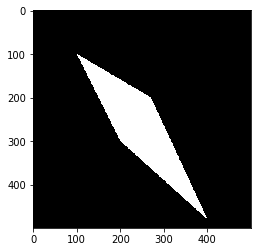

In [19]:
img = np.zeros((500, 500, 3), dtype=np.uint8)
x = np.array([100, 200, 480, 300])
y = np.array([100, 270, 400, 200])
xx, yy = sdraw.polygon(x, y)
img[xx, yy] = 255
plt.imshow(img)

## 7. Adding `text`

Unfortunately, we only can using `OpenCV` to put your texts in the image but the `skimage` didn't (until now).

First, we create something before adding text!

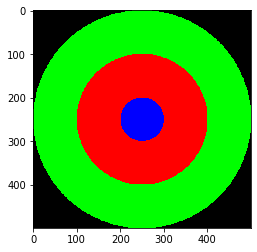

In [20]:
img = np.zeros((500, 500, 3), dtype=np.uint8)

img = cv2.circle(img, (250, 250), 250, (0, 255, 0), -1)
img = cv2.circle(img, (250, 250), 150, (255, 0, 0), -1)
img = cv2.circle(img, (250, 250), 50, (0, 0, 255), -1)
plt.imshow(img)

Adding text with the syntax:

                cv2.putText(image, your_text, pos_coord, font_type, font_scale, line_type)
                
$\qquad$ **Explaination.**

$\qquad \qquad \qquad \bullet$ `your_text` is the `context` that you want to put in the image.

$\qquad \qquad \qquad \bullet$ `pos_coord` is the position coordinates of where you want put it.

$\qquad$ And now, we will add the text in our image!

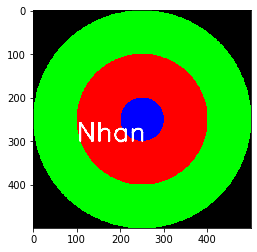

In [21]:
font_type = cv2.FONT_HERSHEY_SIMPLEX
line_type = cv2.LINE_AA

img = cv2.putText(img, 'Nhan', (100, 300), font_type, 2, (255, 255, 255), 4, line_type)
plt.imshow(img);

To get more information of this function, press `help(cv2.putText)`